## Ch12_Q03

In [460]:
import numpy as np
import matplotlib.pyplot as plt

observations = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])

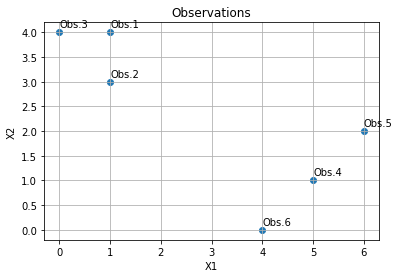

In [461]:
# (a) Plot the observations

plt.scatter(observations[:, 0], observations[:, 1])
for i, obs in enumerate(observations):
    plt.annotate(f'Obs.{i+1}', (obs[0], obs[1]), textcoords="offset points", xytext=(0, 5))

plt.title('Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [462]:
# (b) Randomly assign a cluster label to each observation

labels = np.random.choice([0, 1], size=6)
for i, label in enumerate(labels, 1):
    print(f'Obs.{i}: Cluster {label}')

Obs.1: Cluster 1
Obs.2: Cluster 0
Obs.3: Cluster 0
Obs.4: Cluster 0
Obs.5: Cluster 0
Obs.6: Cluster 0


In [463]:
# (c) Compute the centroid for each cluster

centroids = []
for i in range(2):
    cluster_points = observations[labels == i]
    if cluster_points.size > 0:
        centroid = cluster_points.mean(axis=0)
        formatted_centroid = f"[{centroid[0]:.2f}, {centroid[1]:.2f}]"
        print(f"Centroid of Cluster {i}: {formatted_centroid}")
        centroids.append(centroid)


Centroid of Cluster 0: [3.20, 2.00]
Centroid of Cluster 1: [1.00, 4.00]


In [464]:
# (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance

centroids = np.array(centroids)

# 為每個觀察值指派最近的質心
cluster_labels = []
for obs in observations:
    distances = np.linalg.norm(obs - centroids, axis=1)  # 計算到每個質心的距離
    closest_centroid = np.argmin(distances)  # 找到最近的質心
    cluster_labels.append(closest_centroid)

for i in range(6):
    print(f'Obs.{i+1}: Cluster {(cluster_labels[i])}')

Obs.1: Cluster 1
Obs.2: Cluster 1
Obs.3: Cluster 1
Obs.4: Cluster 0
Obs.5: Cluster 0
Obs.6: Cluster 0


In [465]:
# (e)
final_labels = []

while final_labels != cluster_labels:
    final_labels = cluster_labels
    labels = np.random.choice([0, 1], size=6)
    centroids = []
    
    for i in range(2):
        cluster_points = observations[labels == i]
        if cluster_points.size > 0:
            centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)
   
    centroids = np.array(centroids)
    cluster_labels = []      
    for obs in observations:
        distances = np.linalg.norm(obs - centroids, axis=1)  
        closest_centroid = np.argmin(distances)  
        cluster_labels.append(closest_centroid)

print("Final Cluster Labels:")
for i in range(6):
    print(f'Obs.{i+1}: Cluster {(final_labels[i])}')
    

print("\nFinal Centroids:")    
for i in range(2):
    final_labels = np.array(final_labels)
    cluster_points = observations[final_labels == i]
    if cluster_points.size > 0:
        centroid = cluster_points.mean(axis=0)
        formatted_centroid = f"[{centroid[0]:.2f}, {centroid[1]:.2f}]"
        print(f"Centroid of Cluster {i}: {formatted_centroid}")

Final Cluster Labels:
Obs.1: Cluster 1
Obs.2: Cluster 1
Obs.3: Cluster 1
Obs.4: Cluster 0
Obs.5: Cluster 0
Obs.6: Cluster 0

Final Centroids:
Centroid of Cluster 0: [5.00, 1.00]
Centroid of Cluster 1: [0.67, 3.67]


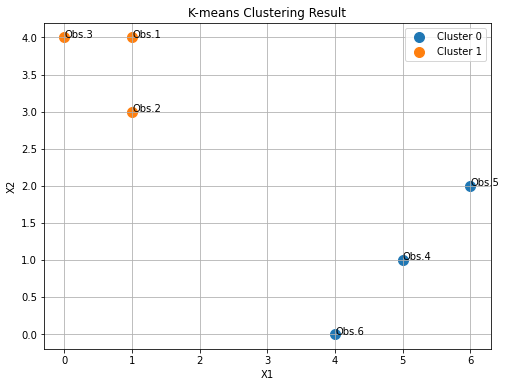

In [467]:
# (f) color the observations according to the cluster labels obtained.

plt.figure(figsize=(8, 6))
for i in range(2):
    cluster_points = observations[final_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', s=100)
    

for i, obs in enumerate(observations):
    plt.annotate(f'Obs.{i+1}', (obs[0], obs[1]))


plt.title('K-means Clustering Result')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.grid(True)
plt.show()